In [1]:
#1. Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на
#   точность классификации или на вероятность ошибочной классификации в примере
#   крестикинолики и примере о спаме e-mail сообщеЫний.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB 
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo 

In [73]:
# Загружаем DS крестики-нолики (Data set)
data_XO = pd.read_table('Tic_tac_toe.txt', sep=',',names=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10'])

# Преобразуем символы в числа в DS крестики нолики
label_encoder = LabelEncoder()
for column in data_XO.columns:
    data_XO[column] = label_encoder.fit_transform(data_XO[column])

# Извлечение признаков и целевой переменной
X = data_XO.drop('V10', axis=1)
y = data_XO['V10']

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
   Test Size  Accuracy
0        9.0  0.708333
1       18.0  0.708333
2       27.0  0.708333
3       36.0  0.710417
4       45.0  0.714583
5       54.0  0.708333
6       63.0  0.706250
7       72.0  0.706250
8       81.0  0.660417


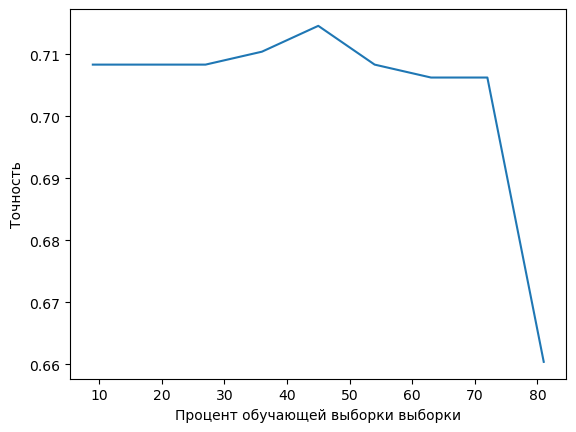

In [74]:
# Отделяем тестую выборку в размере 10 % от всех данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X = X_train
y = y_train

# Список для хранения результатов
results = []

# Задаем диапазон процента обучающей выборки
test_sizes = np.arange(0.1, 1.0, 0.1)
print (test_sizes)


# Задаем N (Будет находиться средний из N результатов для каждой обучающей выборки)
N =10

# Вычисляем точность класофикации N раз
for i in range(N):
        for test_size in test_sizes:  # Меняем размер обучающей выборки от 81% до 9%
            X_train, X_non, y_train, y_non = train_test_split(X, y, test_size=test_size)
            
            # Создаем и обучаем модель
            nbais = MultinomialNB() 
            nbais.fit(X_train, y_train)
            
            # Предсказываем классы на тестовой выборке
            nbais.predict(X_test)
            
             # Оценка качества классификации
            accuracy = nbais.score(X_test,y_test)
            
            # Добавление результатов в список
            found = False
            for i, (first, second) in enumerate(results):
                if first == test_size:
                    results[i] = (first, second + accuracy)
                    found = True
                    break
    
            if not found:
                results.append((test_size, accuracy))

# Создание DataFrame из списка результатов
for i, (first, second) in enumerate(results):
    results[i] = (first*90, second/N)
    
results_df = pd.DataFrame(results, columns=['Test Size', 'Accuracy'])
print (results_df)

# Создание графика
plt.plot(results_df['Test Size'], results_df['Accuracy'])
plt.xlabel('Процент обучающей выборки выборки')
plt.ylabel('Точность')
# Отображение графика


plt.show()

In [19]:
# Загружаем DS спам-сообщений (Data set)
data_spam = fetch_ucirepo(id=94)

#DS E-mail_spam
X = data_spam.data.features
y = data_spam.data.targets.values.ravel()  

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
   Test Size  Accuracy
0        9.0  0.773536
1       18.0  0.771584
2       27.0  0.775488
3       36.0  0.775922
4       45.0  0.776573
5       54.0  0.786768
6       63.0  0.788503
7       72.0  0.783514
8       81.0  0.773102


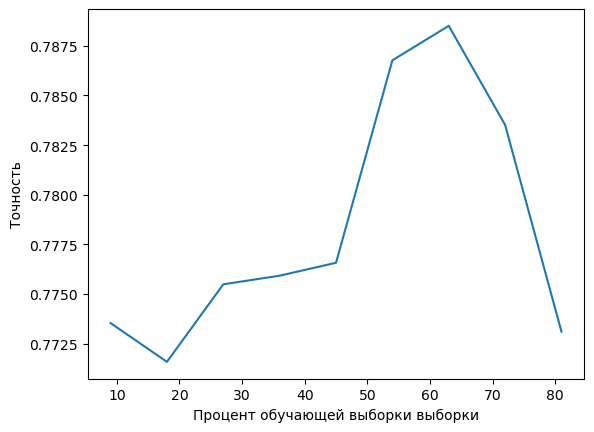

In [20]:
# Отделяем тестую выборку в размере 10 % от всех данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X = X_train
y = y_train

# Список для хранения результатов
results = []

# Задаем диапазон процента обучающей выборки
test_sizes = np.arange(0.1, 1.0, 0.1)
print (test_sizes)


# Задаем N (Будет находиться средний из N результатов для каждой обучающей выборки)
N =10

# Вычисляем точность класофикации N раз
for i in range(N):
        for test_size in test_sizes:  # Меняем размер обучающей выборки от 81% до 9%
            X_train, X_non, y_train, y_non = train_test_split(X, y, test_size=test_size)
            
            # Создаем и обучаем модель
            nbais = MultinomialNB() 
            nbais.fit(X_train, y_train)
            
            # Предсказываем классы на тестовой выборке
            nbais.predict(X_test)
            
             # Оценка качества классификации
            accuracy = nbais.score(X_test,y_test)
            
            # Добавление результатов в список
            found = False
            for i, (first, second) in enumerate(results):
                if first == test_size:
                    results[i] = (first, second + accuracy)
                    found = True
                    break
    
            if not found:
                results.append((test_size, accuracy))

# Создание DataFrame из списка результатов
for i, (first, second) in enumerate(results):
    results[i] = (first*90, second/N)
    
results_df = pd.DataFrame(results, columns=['Test Size', 'Accuracy'])
print (results_df)

# Создание графика
plt.plot(results_df['Test Size'], results_df['Accuracy'])
plt.xlabel('Процент обучающей выборки выборки')
plt.ylabel('Точность')
# Отображение графика


plt.show()


In [23]:
# Загружаем DS крестики-нолики (Data set)
data_XO = pd.read_table('Tic_tac_toe.txt', sep=',',names=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10'])

# Преобразуем символы в числа в DS крестики нолики
label_encoder = LabelEncoder()
for column in data_XO.columns:
    data_XO[column] = label_encoder.fit_transform(data_XO[column])

# Извлечение признаков и целевой переменной
X = data_XO.drop('V10', axis=1)
y = data_XO['V10']

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


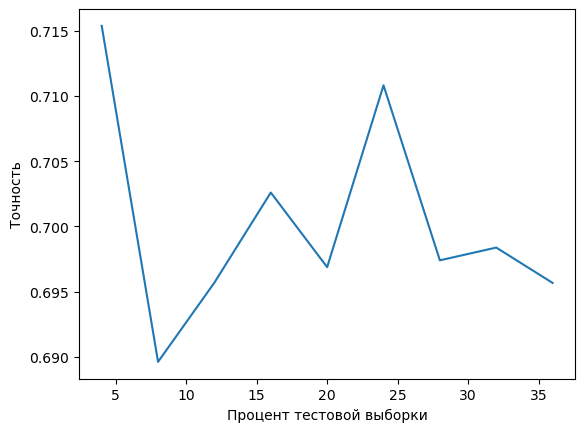

In [24]:
# Отделяем обучающую выбоку в размере 60 % от всех данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X = X_test
y = y_test

# Список для хранения результатов
results = []

# Задаем диапазон процента тестовой выборки
test_sizes = np.arange(0.1, 1.0, 0.1)
print (test_sizes)

# Задаем N (Будет находиться средний из N результатов для каждой тестовой выборки)
N = 10

# Цикл по значениям i от 0 до N-1
for i in range(N):
        # Изменение размера обучающей и тестовой выборок и оценка точности
        for test_size in test_sizes:  # Меняем размер тестовой выборки выборки от 4% до 36%
            X_non, X_test, y_non, y_test = train_test_split(X, y, test_size=test_size)
            
            # Создаем и обучаем модель
            nbais = MultinomialNB() 
            nbais.fit(X_train, y_train)
            
            # Предсказываем классы на тестовой выборке
            nbais.predict(X_test)
            
             # Оценка качества классификации
            accuracy = nbais.score(X_test,y_test)
            
            # Добавление результатов в список
            found = False
            for i, (first, second) in enumerate(results):
                if first == test_size:
                    results[i] = (first, second + accuracy)
                    found = True
                    break
    
            if not found:
                results.append((test_size, accuracy))

# Создание DataFrame из списка результатов
for i, (first, second) in enumerate(results):
    results[i] = (first*40, second/N)
results_df = pd.DataFrame(results, columns=['Test Size', 'Accuracy'])

# Создание графика
plt.plot(results_df['Test Size'], results_df['Accuracy'])
plt.xlabel('Процент тестовой выборки')
plt.ylabel('Точность')
# Отображение графика
plt.show()

In [21]:
# Загружаем DS спам-сообщений (Data set)
data_spam = fetch_ucirepo(id=94)

#DS E-mail_spam
X = data_spam.data.features
y = data_spam.data.targets.values.ravel()  

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


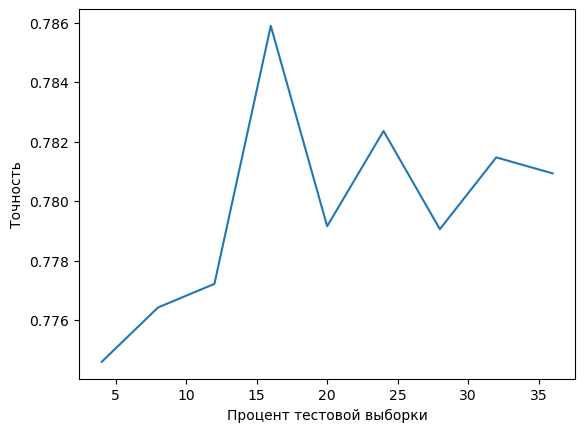

In [22]:
# Отделяем обучающую выбоку в размере 60 % от всех данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X = X_test
y = y_test

# Список для хранения результатов
results = []

# Задаем диапазон процента тестовой выборки
test_sizes = np.arange(0.1, 1.0, 0.1)
print (test_sizes)

# Задаем N (Будет находиться средний из N результатов для каждой тестовой выборки)
N = 10

# Цикл по значениям i от 0 до N-1
for i in range(N):
        # Изменение размера обучающей и тестовой выборок и оценка точности
        for test_size in test_sizes:  # Меняем размер тестовой выборки выборки от 4% до 36%
            X_non, X_test, y_non, y_test = train_test_split(X, y, test_size=test_size)
            
            # Создаем и обучаем модель
            nbais = MultinomialNB() 
            nbais.fit(X_train, y_train)
            
            # Предсказываем классы на тестовой выборке
            nbais.predict(X_test)
            
             # Оценка качества классификации
            accuracy = nbais.score(X_test,y_test)
            
            # Добавление результатов в список
            found = False
            for i, (first, second) in enumerate(results):
                if first == test_size:
                    results[i] = (first, second + accuracy)
                    found = True
                    break
    
            if not found:
                results.append((test_size, accuracy))

# Создание DataFrame из списка результатов
for i, (first, second) in enumerate(results):
    results[i] = (first*40, second/N)
results_df = pd.DataFrame(results, columns=['Test Size', 'Accuracy'])

# Создание графика
plt.plot(results_df['Test Size'], results_df['Accuracy'])
plt.xlabel('Процент тестовой выборки')
plt.ylabel('Точность')
# Отображение графика
plt.show()